In [1]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()


In [2]:
rendimento = """
select
 pk_indicador
,indicador
,abertura_territorio
,categoria_abertura_1
,sum(cast(replace(julho,' ','') as int)) as julho
 from `pnad_covid.tb_regiao`
where
tipo_dado = 'quantidade' and
pk_indicador = 112
and variavel_abertura_1 like 'Rendimento real%'
group by
pk_indicador
,indicador
,abertura_territorio
,categoria_abertura_1


"""

df_rendimento= client.query(rendimento).to_dataframe()

In [3]:
df_rendimento

,pk_indicador,indicador,abertura_territorio,categoria_abertura_1,julho
0,112,Pessoas que fizeram algum teste para saber se ...,Nordeste,4 ou mais Salários Mínimos,218
1,112,Pessoas que fizeram algum teste para saber se ...,Norte,4 ou mais Salários Mínimos,66
2,112,Pessoas que fizeram algum teste para saber se ...,CentroOeste,4 ou mais Salários Mínimos,197
3,112,Pessoas que fizeram algum teste para saber se ...,Sul,4 ou mais Salários Mínimos,140
4,112,Pessoas que fizeram algum teste para saber se ...,Sudeste,4 ou mais Salários Mínimos,848
5,112,Pessoas que fizeram algum teste para saber se ...,CentroOeste,Menos de 1/2 Salário Mínimo,150
6,112,Pessoas que fizeram algum teste para saber se ...,Sudeste,Menos de 1/2 Salário Mínimo,557
7,112,Pessoas que fizeram algum teste para saber se ...,Nordeste,Menos de 1/2 Salário Mínimo,734
8,112,Pessoas que fizeram algum teste para saber se ...,Norte,Menos de 1/2 Salário Mínimo,300
9,112,Pessoas que fizeram algum teste para saber se ...,Sul,Menos de 1/2 Salário Mínimo,135


##NORTE

In [4]:
df_rendimento_norte = df_rendimento[df_rendimento['abertura_territorio']=='Norte']

In [5]:
df_rendimento_norte['Total'] = df_rendimento_norte['julho'].sum()
df_rendimento_norte['%'] = df_rendimento_norte['julho']/df_rendimento_norte['Total']

<ipython-input-5-8c0db66aac51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_norte['Total'] = df_rendimento_norte['julho'].sum()
<ipython-input-5-8c0db66aac51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_norte['%'] = df_rendimento_norte['julho']/df_rendimento_norte['Total']


In [6]:
df_rendimento_norte

,pk_indicador,indicador,abertura_territorio,categoria_abertura_1,julho,Total,%
1,112,Pessoas que fizeram algum teste para saber se ...,Norte,4 ou mais Salários Mínimos,66,1310,0.050382
8,112,Pessoas que fizeram algum teste para saber se ...,Norte,Menos de 1/2 Salário Mínimo,300,1310,0.229008
10,112,Pessoas que fizeram algum teste para saber se ...,Norte,1 a menos de 2 Salários Mínimos,316,1310,0.241221
19,112,Pessoas que fizeram algum teste para saber se ...,Norte,1/2 a menos de 1 Salário Mínimo,459,1310,0.350382
22,112,Pessoas que fizeram algum teste para saber se ...,Norte,2 a menos de 4 Salários Mínimos,169,1310,0.129008


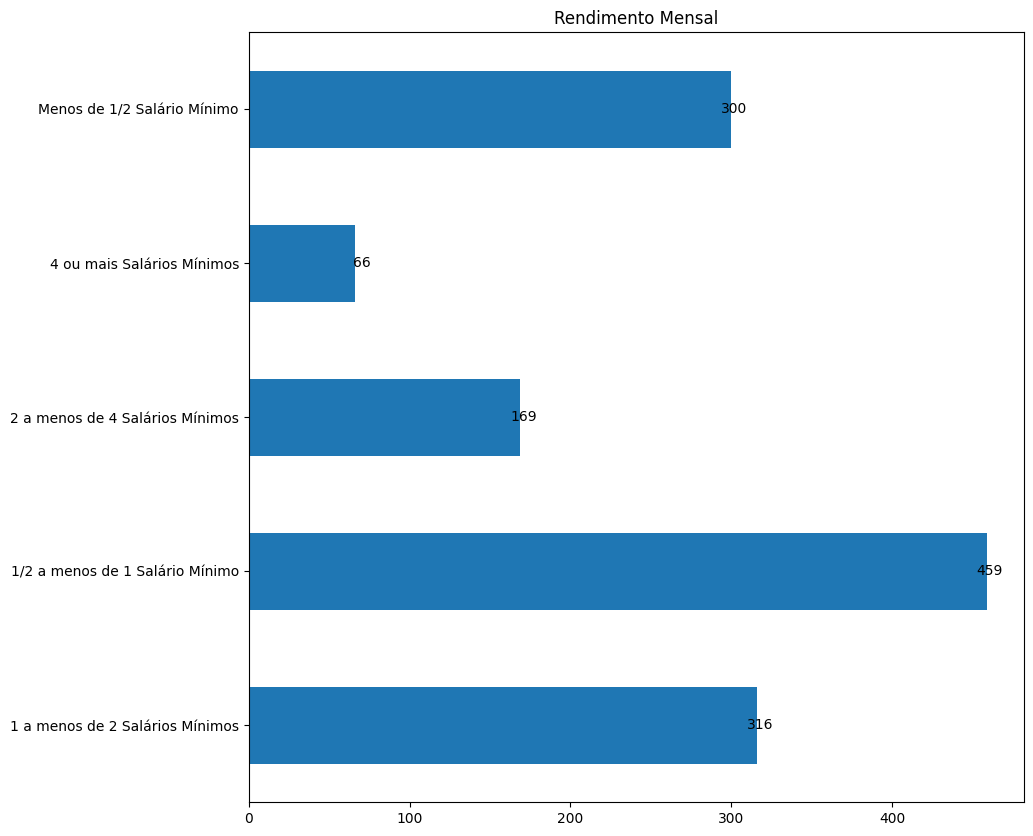

In [7]:
df_rendimento_norte = df_rendimento_norte.sort_values(by='julho')
pvt = df_rendimento_norte.pivot_table(values = 'julho', index = 'categoria_abertura_1')


ax = pvt.plot(kind = 'barh',figsize=(10,10),legend=False)
plt.title('Rendimento Mensal')
plt.xlabel('')
plt.ylabel('')

for i in ax.patches:
    ax.text(i.get_width() + 10, i.get_y() + i.get_height() / 2, str(int(i.get_width())),
            ha='right', va='center')

In [8]:
df_rendimento_norte.set_index('categoria_abertura_1', inplace=True)

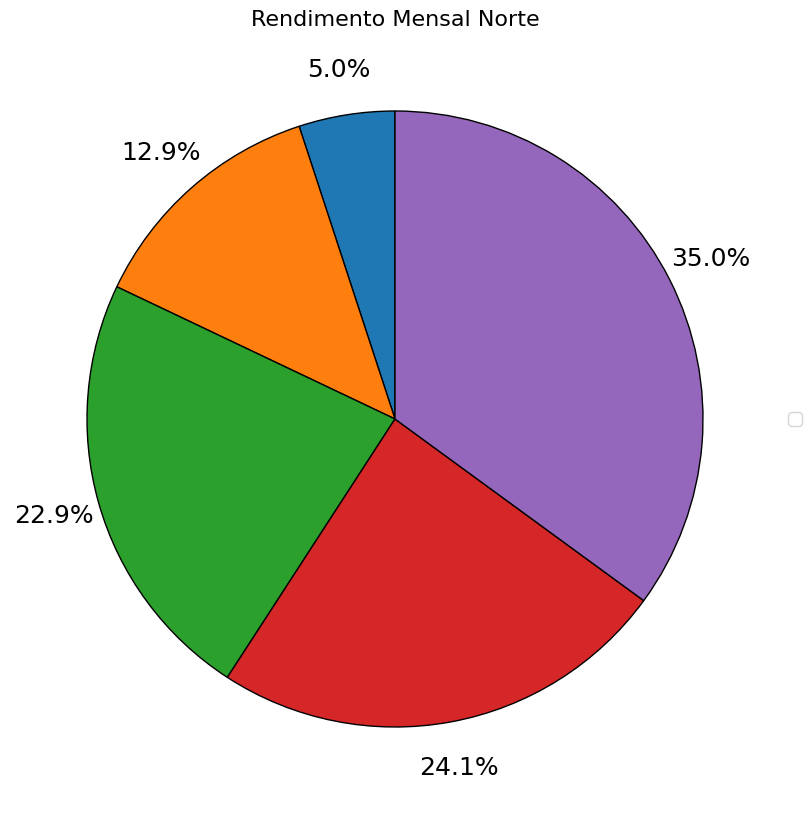

In [11]:

graf = df_rendimento_norte.plot.pie(y='%',x='categoria_abertura_1',figsize=(10,10),labels = None, autopct='%1.1f%%',startangle=90,pctdistance=1.15, wedgeprops={'edgecolor': 'black'},textprops={'color': 'black', 'fontsize': 18})
plt.title('Rendimento Mensal Norte',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.axis('off')
plt.show()

##NORDESTE

In [ ]:
df_rendimento_nordeste = df_rendimento[df_rendimento['abertura_territorio']=='Nordeste']
df_rendimento_nordeste['Total'] = df_rendimento_nordeste['julho'].sum()
df_rendimento_nordeste['%'] = df_rendimento_nordeste['julho']/df_rendimento_nordeste['Total']

<ipython-input-16-7968ec5d3a15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_nordeste['Total'] = df_rendimento_nordeste['julho'].sum()
<ipython-input-16-7968ec5d3a15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_nordeste['%'] = df_rendimento_nordeste['julho']/df_rendimento_nordeste['Total']


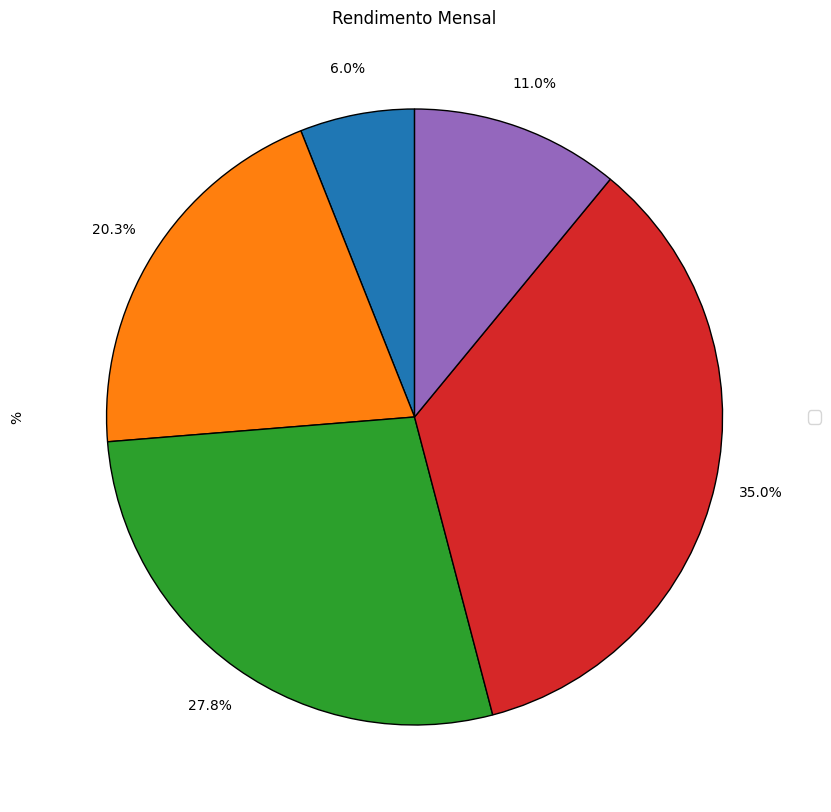

In [ ]:
graf = df_rendimento_nordeste.plot.pie(y='%',x='categoria_abertura_1',figsize=(10,10),labels = None, autopct='%1.1f%%',startangle=90,pctdistance=1.15, wedgeprops={'edgecolor': 'black'})
plt.title('Rendimento Mensal')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

plt.show()

##Centro Oeste

In [ ]:
df_rendimento_centro = df_rendimento[df_rendimento['abertura_territorio']=='CentroOeste']
df_rendimento_centro['Total'] = df_rendimento_centro['julho'].sum()
df_rendimento_centro['%'] = df_rendimento_centro['julho']/df_rendimento_centro['Total']

<ipython-input-17-70f6b34959f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_centro['Total'] = df_rendimento_centro['julho'].sum()
<ipython-input-17-70f6b34959f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_centro['%'] = df_rendimento_centro['julho']/df_rendimento_centro['Total']


##SUDESTE

In [ ]:
df_rendimento_sudeste = df_rendimento[df_rendimento['abertura_territorio']=='Sudeste']
df_rendimento_sudeste['Total'] = df_rendimento_sudeste['julho'].sum()
df_rendimento_sudeste['%'] = df_rendimento_sudeste['julho']/df_rendimento_sudeste['Total']

<ipython-input-18-724ee56baa11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_sudeste['Total'] = df_rendimento_sudeste['julho'].sum()
<ipython-input-18-724ee56baa11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_sudeste['%'] = df_rendimento_sudeste['julho']/df_rendimento_sudeste['Total']


##SUL

In [ ]:
df_rendimento_sul = df_rendimento[df_rendimento['abertura_territorio']=='Sul']
df_rendimento_sul['Total'] = df_rendimento_sul['julho'].sum()
df_rendimento_sul['%'] = df_rendimento_sul['julho']/df_rendimento_sul['Total']

<ipython-input-19-891431233e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_sul['Total'] = df_rendimento_sul['julho'].sum()
<ipython-input-19-891431233e2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimento_sul['%'] = df_rendimento_sul['julho']/df_rendimento_sul['Total']


##CONSOLIDADO

In [ ]:
df_julho_consolidado = pd.concat([df_rendimento_sul,df_rendimento_sudeste,df_rendimento_nordeste,df_rendimento_centro,df_rendimento_norte])
df_julho_consolidado_plano = df_julho_consolidado[df_julho_consolidado['categoria_abertura_2']=='Tem plano de saúde médico']

df_julho_consolidado_plano = df_julho_consolidado_plano.sort_values(by='%')
ax=df_julho_consolidado_plano.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='abertura_territorio')
for i, v in enumerate(df_julho_consolidado_plano['%']):
    ax.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.title('Regiões com mais idosos com plano de saude')
plt.legend(loc='best')
plt.grid(True)